In [7]:
"""
Pareto Principle: 
- as applied to the distribution of wealth, proposes that the 80% of all wealth is owned by 20% of the population. 
- this can be illustrated by a simple coin toss experiment. 
- imagine a trading game between 'n' players who all start the game with 10 coins. 
- each player tosses a coin agaist a random opponent and the winner takes 1 coin from the loser. 
- when a player has no coins left, that player stops playing. 
"""
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

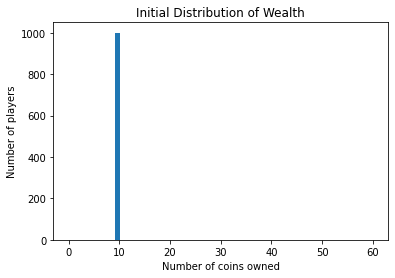

In [8]:
# Set up the array of n players all starting with 10 coins. 
n = 1000  # Sets the number of players.
coins = 10 # Sets the number coins each player starts with.   
players = coins * np.ones(n)

# As you can see from the histogram below all players start with 10 coins each. 
plt.title("Initial Distribution of Wealth")
plt.xlabel("Number of coins owned")
plt.ylabel("Number of players")
plt.hist(players,bins = np.linspace(0, 60, num=60))
plt.show()

In [9]:
# Returns the winner of a coin toss between two players "x" and "y".

def coinToss(x,y):
    return x if np.random.binomial(1,0.5) else y
    

In [10]:
# We iterate through the players 0 to n and pick an opponent at random.  

def playRound(players):
    
    for i, player in np.ndenumerate(players): 
        a = i[0]
        
        # A player that has zero coins is out the game so we skip that player.
        if players[a] != 0:
            
            # pick a random opponent
            b = np.random.randint(0,n)

            # Player cannot play against him/her self so pick another opponent. 
            # If that opponent has zero coins, pick another opponent. 
            while b == a or players[b] == 0:  
                b = np.random.randint(0,n)

            # Toss a coin to determine winner.
            winner = coinToss(a,b)  
            
            # Winner takes coin from loser. 
            if winner == a:
                players[a] += 1
                players[b] -= 1
            else:
                players[b] += 1
                players[a] -= 1

    return players


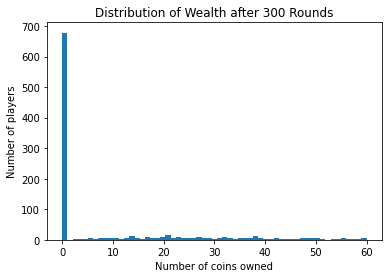

In [11]:
# Let's play a large number of rounds and see how the distribution of wealth changes. 

rounds = 300
for r in range(rounds):
    playRound(players)

plt.title("Distribution of Wealth after " + str(rounds) + " Rounds")
plt.xlabel("Number of coins owned")
plt.ylabel("Number of players")
plt.hist(players,bins = np.linspace(0, 60, num=60))
plt.show()


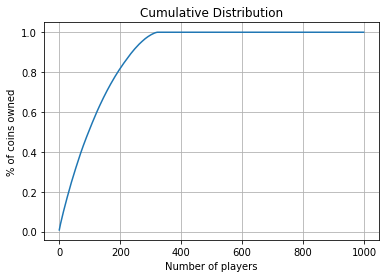


The richest 19 % of players own 80 % of all the coins.


In [12]:
# Let's look at the cumulative distribution of wealth. 

dist = np.sort(players)[::-1]
cumsum = np.cumsum(dist)/float(n*coins)

plt.title("Cumulative Distribution")
plt.xlabel("Number of players")
plt.ylabel("% of coins owned")
plt.grid(True)
plt.plot(cumsum)
plt.show()

print("")
print("The richest", round(np.count_nonzero(cumsum <= 0.8)/n*100),"% of players own 80 % of all the coins.")


